## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import the Dataset

In [3]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

## About the data:

- age: Age of the patient
- anaemia: If the patient had the haemoglobin below the normal range
- creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
- diabetes: If the patient was diabetic
- ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
- high_blood_pressure: If the patient had hypertension
- platelets: Platelet count of blood in kiloplatelets/mL
- serum_creatinine: The level of serum creatinine in the blood in mg/dL
- serum_sodium: The level of serum sodium in the blood in mEq/L
- sex: The sex of the patient
- smoking: If the patient smokes actively or ever did in past
- time: It is the time of the patient's follow-up visit for the disease in months
- DEATH_EVENT: If the patient deceased during the follow-up period

## EDA

In [5]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Data Visualization

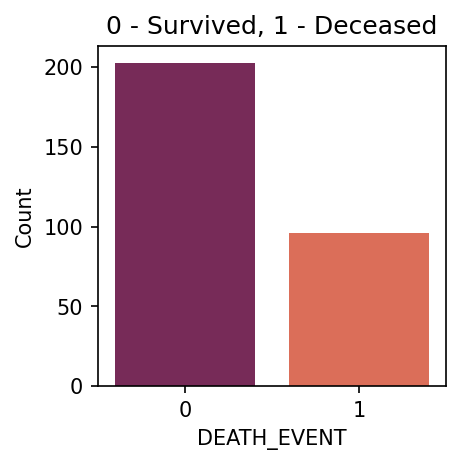

In [8]:
plt.figure(figsize=(3,3),dpi=150)
sns.countplot(x="DEATH_EVENT", data=df,palette='rocket')
plt.title('0 - Survived, 1 - Deceased')
plt.ylabel("Count")
plt.show()

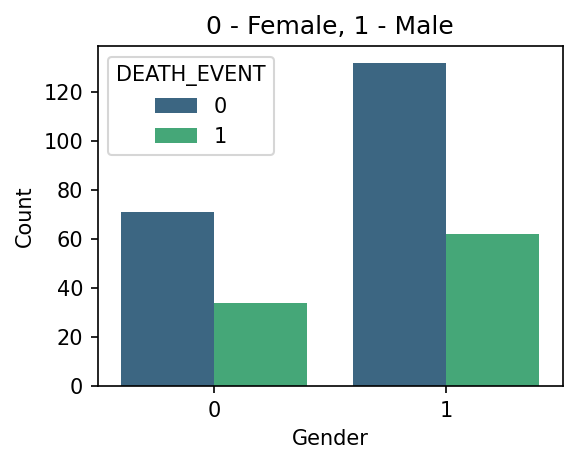

In [9]:
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(x="sex",hue='DEATH_EVENT', data=df,palette='viridis')
plt.ylabel("Count")
plt.xlabel("Gender")
plt.title('0 - Female, 1 - Male')
plt.show()

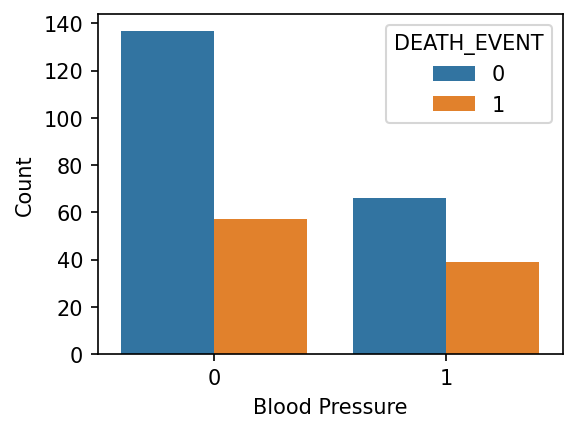

In [10]:
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(x="high_blood_pressure",hue='DEATH_EVENT', data=df)
plt.ylabel("Count")
plt.xlabel("Blood Pressure")
plt.show()

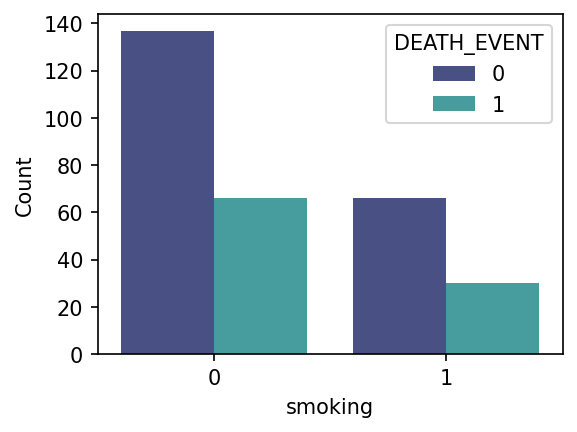

In [11]:
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(x="smoking",hue='DEATH_EVENT', data=df,palette='mako')
plt.ylabel("Count")
plt.show()

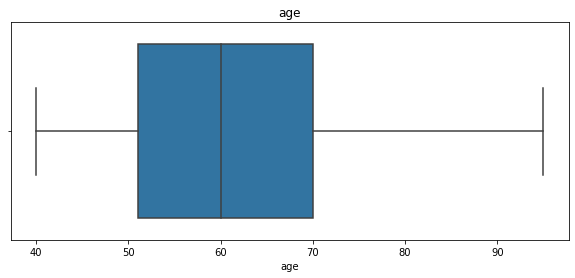

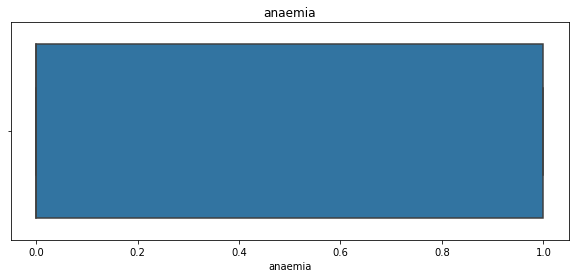

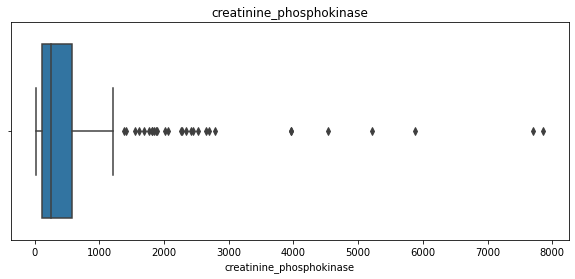

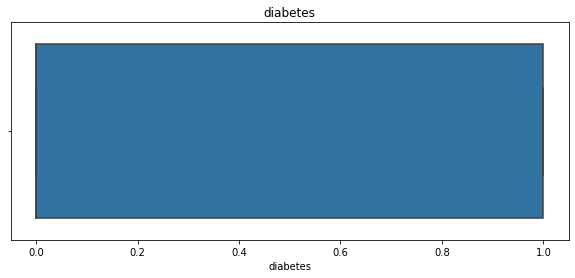

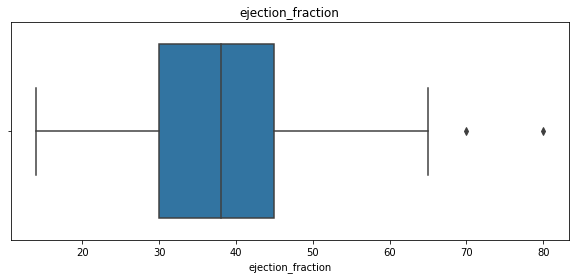

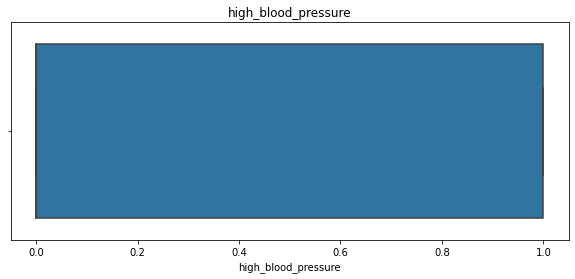

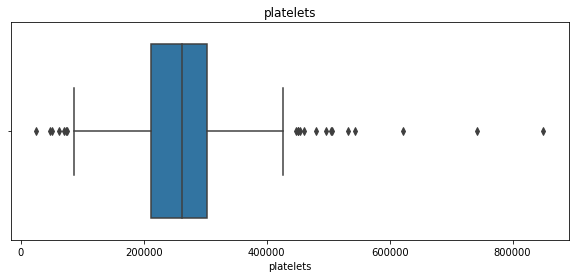

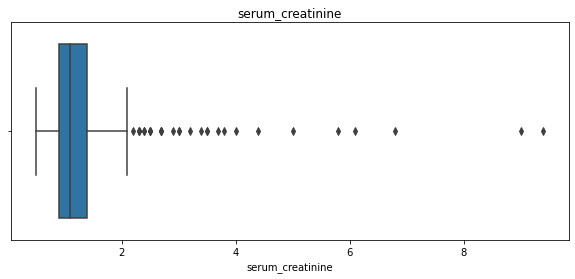

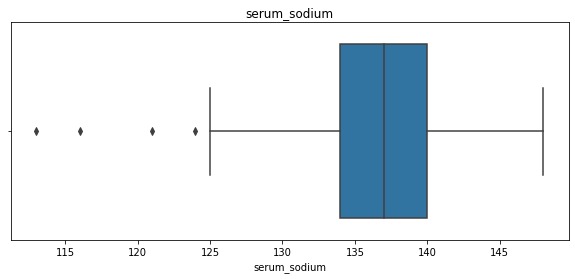

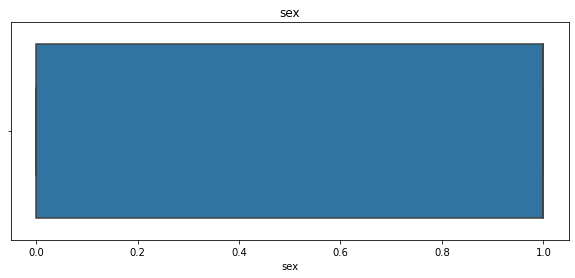

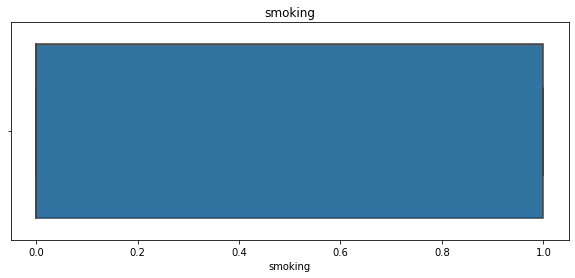

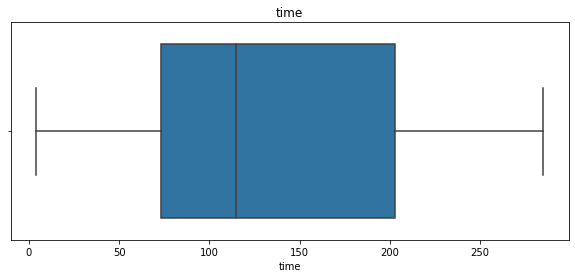

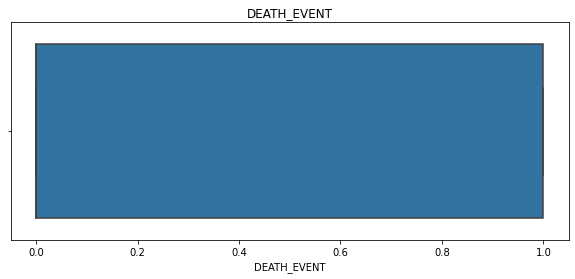

In [12]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title(i)
    sns.boxplot(df)
    plt.show()
for i in df.columns:
    Box_plots(df[i])

The mean value is 136.62541806020067
The kurtosis value is 4.119712007624292
The skewness value is -1.0481360160574988


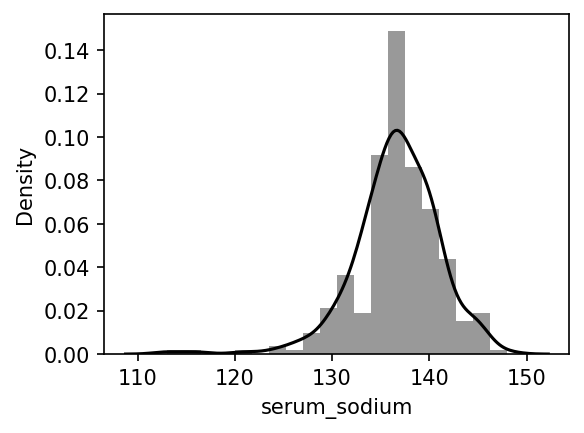

In [13]:
print('The mean value is', df['serum_sodium'].mean())
print('The kurtosis value is', df['serum_sodium'].kurt())
print('The skewness value is', df['serum_sodium'].skew())
plt.figure(figsize=(4,3),dpi=150)
sns.distplot(df['serum_sodium'],color='black')
plt.show()

The mean value is 60.83389297658862
The kurtosis value is -0.18487053195417413
The skewness value is 0.42306190672863536


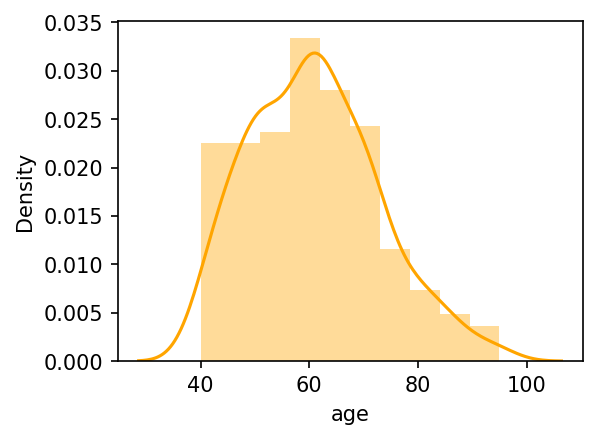

In [14]:
print('The mean value is', df['age'].mean())
print('The kurtosis value is', df['age'].kurt())
print('The skewness value is', df['age'].skew())
plt.figure(figsize=(4,3),dpi=150)
sns.distplot(df['age'],color='orange')
plt.show()

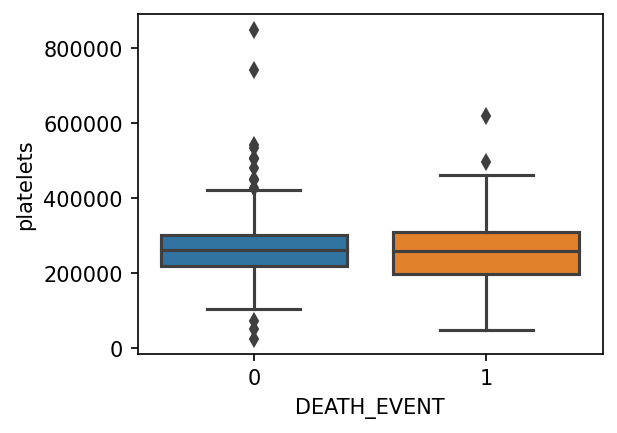

In [15]:
plt.figure(figsize=(4,3),dpi=150)
sns.boxplot(data=df,x='DEATH_EVENT',y='platelets')
plt.show()

In [16]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
df.corr()

age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.066270                  0.062728   

                          diabetes  ejection_fraction  high_blood_pressure  \
age                      -0.101012           0.060098             0.093289   
anaemia                  -0.012729           0.031557             0.038182   
creatinine_phosphokinase -0.009639          -0.044080            -0.070590   
diabetes                  1.000000          -0.004850            -0.012732   
ejection_fraction        -0.004850           1.000000             0.024445   
high_blood_pressure      -0.012732           0.024445             1.000000   
platelets                 0.092193           0.072177             0.049963   
serum_creatinine         -0.046975          -0.011302            -0.004935   
serum_sodium             -0.089551           0.175902             0.037109   
sex                      -0.157730          -0.148386            -0.104615   
smoking                  -0.147173          -0.067315            -0.055711   
time                      0.033726           0.041729            -0.196439   
DEATH_EVENT              -0.001943          -0.268603             0.079351   

                          platelets  serum_creatinine  serum_sodium       sex  \
age                       -0.052354          0.159187     -0.045966  0.065430   
anaemia                   -0.043786          0.052174      0.041882 -0.094769   
creatinine_phosphokinase   0.024463         -0.016408      0.059550  0.079791   
diabetes                   0.092193         -0.046975     -0.089551 -0.157730   
ejection_fraction          0.072177         -0.011302      0.175902 -0.148386   
high_blood_pressure        0.049963         -0.004935      0.037109 -0.104615   
platelets                  1.000000         -0.041198      0.062125 -0.125120   
serum_creatinine          -0.041198          1.000000     -0.189095  0.006970   
serum_sodium               0.062125         -0.189095      1.000000 -0.027566   
sex                       -0.125120          0.006970     -0.027566  1.000000   
smoking                    0.028234         -0.027414      0.004813  0.445892   
time                       0.010514         -0.149315      0.087640 -0.015608   
DEATH_EVENT               -0.049139          0.294278     -0.195204 -0.004316   

                           smoking      time  DEATH_EVENT  
age                       0.018668 -0.224068     0.253729  
anaemia                  -0.107290 -0.141414     0.066270  
creatinine_phosphokinase  0.002421 -0.009346     0.062728  
diabetes                 -0.147173  0.033726    -0.001943  
ejection_fraction        -0.067315  0.041729    -0.268603  
high_blood_pressure      -0.055711 -0.196439     0.079351  
platelets                 0.028234  0.010514    -0.049139  
serum_creatinine         -0.027414 -0.149315     0.294278  
serum_sodium              0.004813  0.087640    -0.195204  
sex                       0.445892 -0.015608    -0.004316  
smoking                   1.000000 -0.022839    -0.012623  
time                     -0.022839  1.000000  

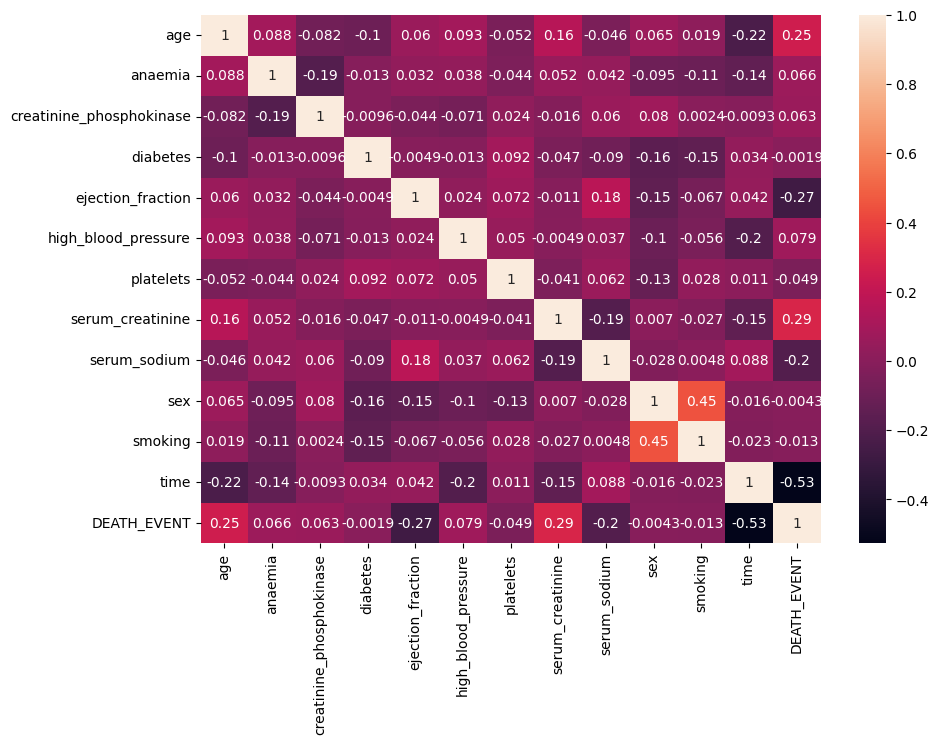

In [18]:
plt.figure(figsize=(10,7),dpi=100)
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 300x300 with 0 Axes>

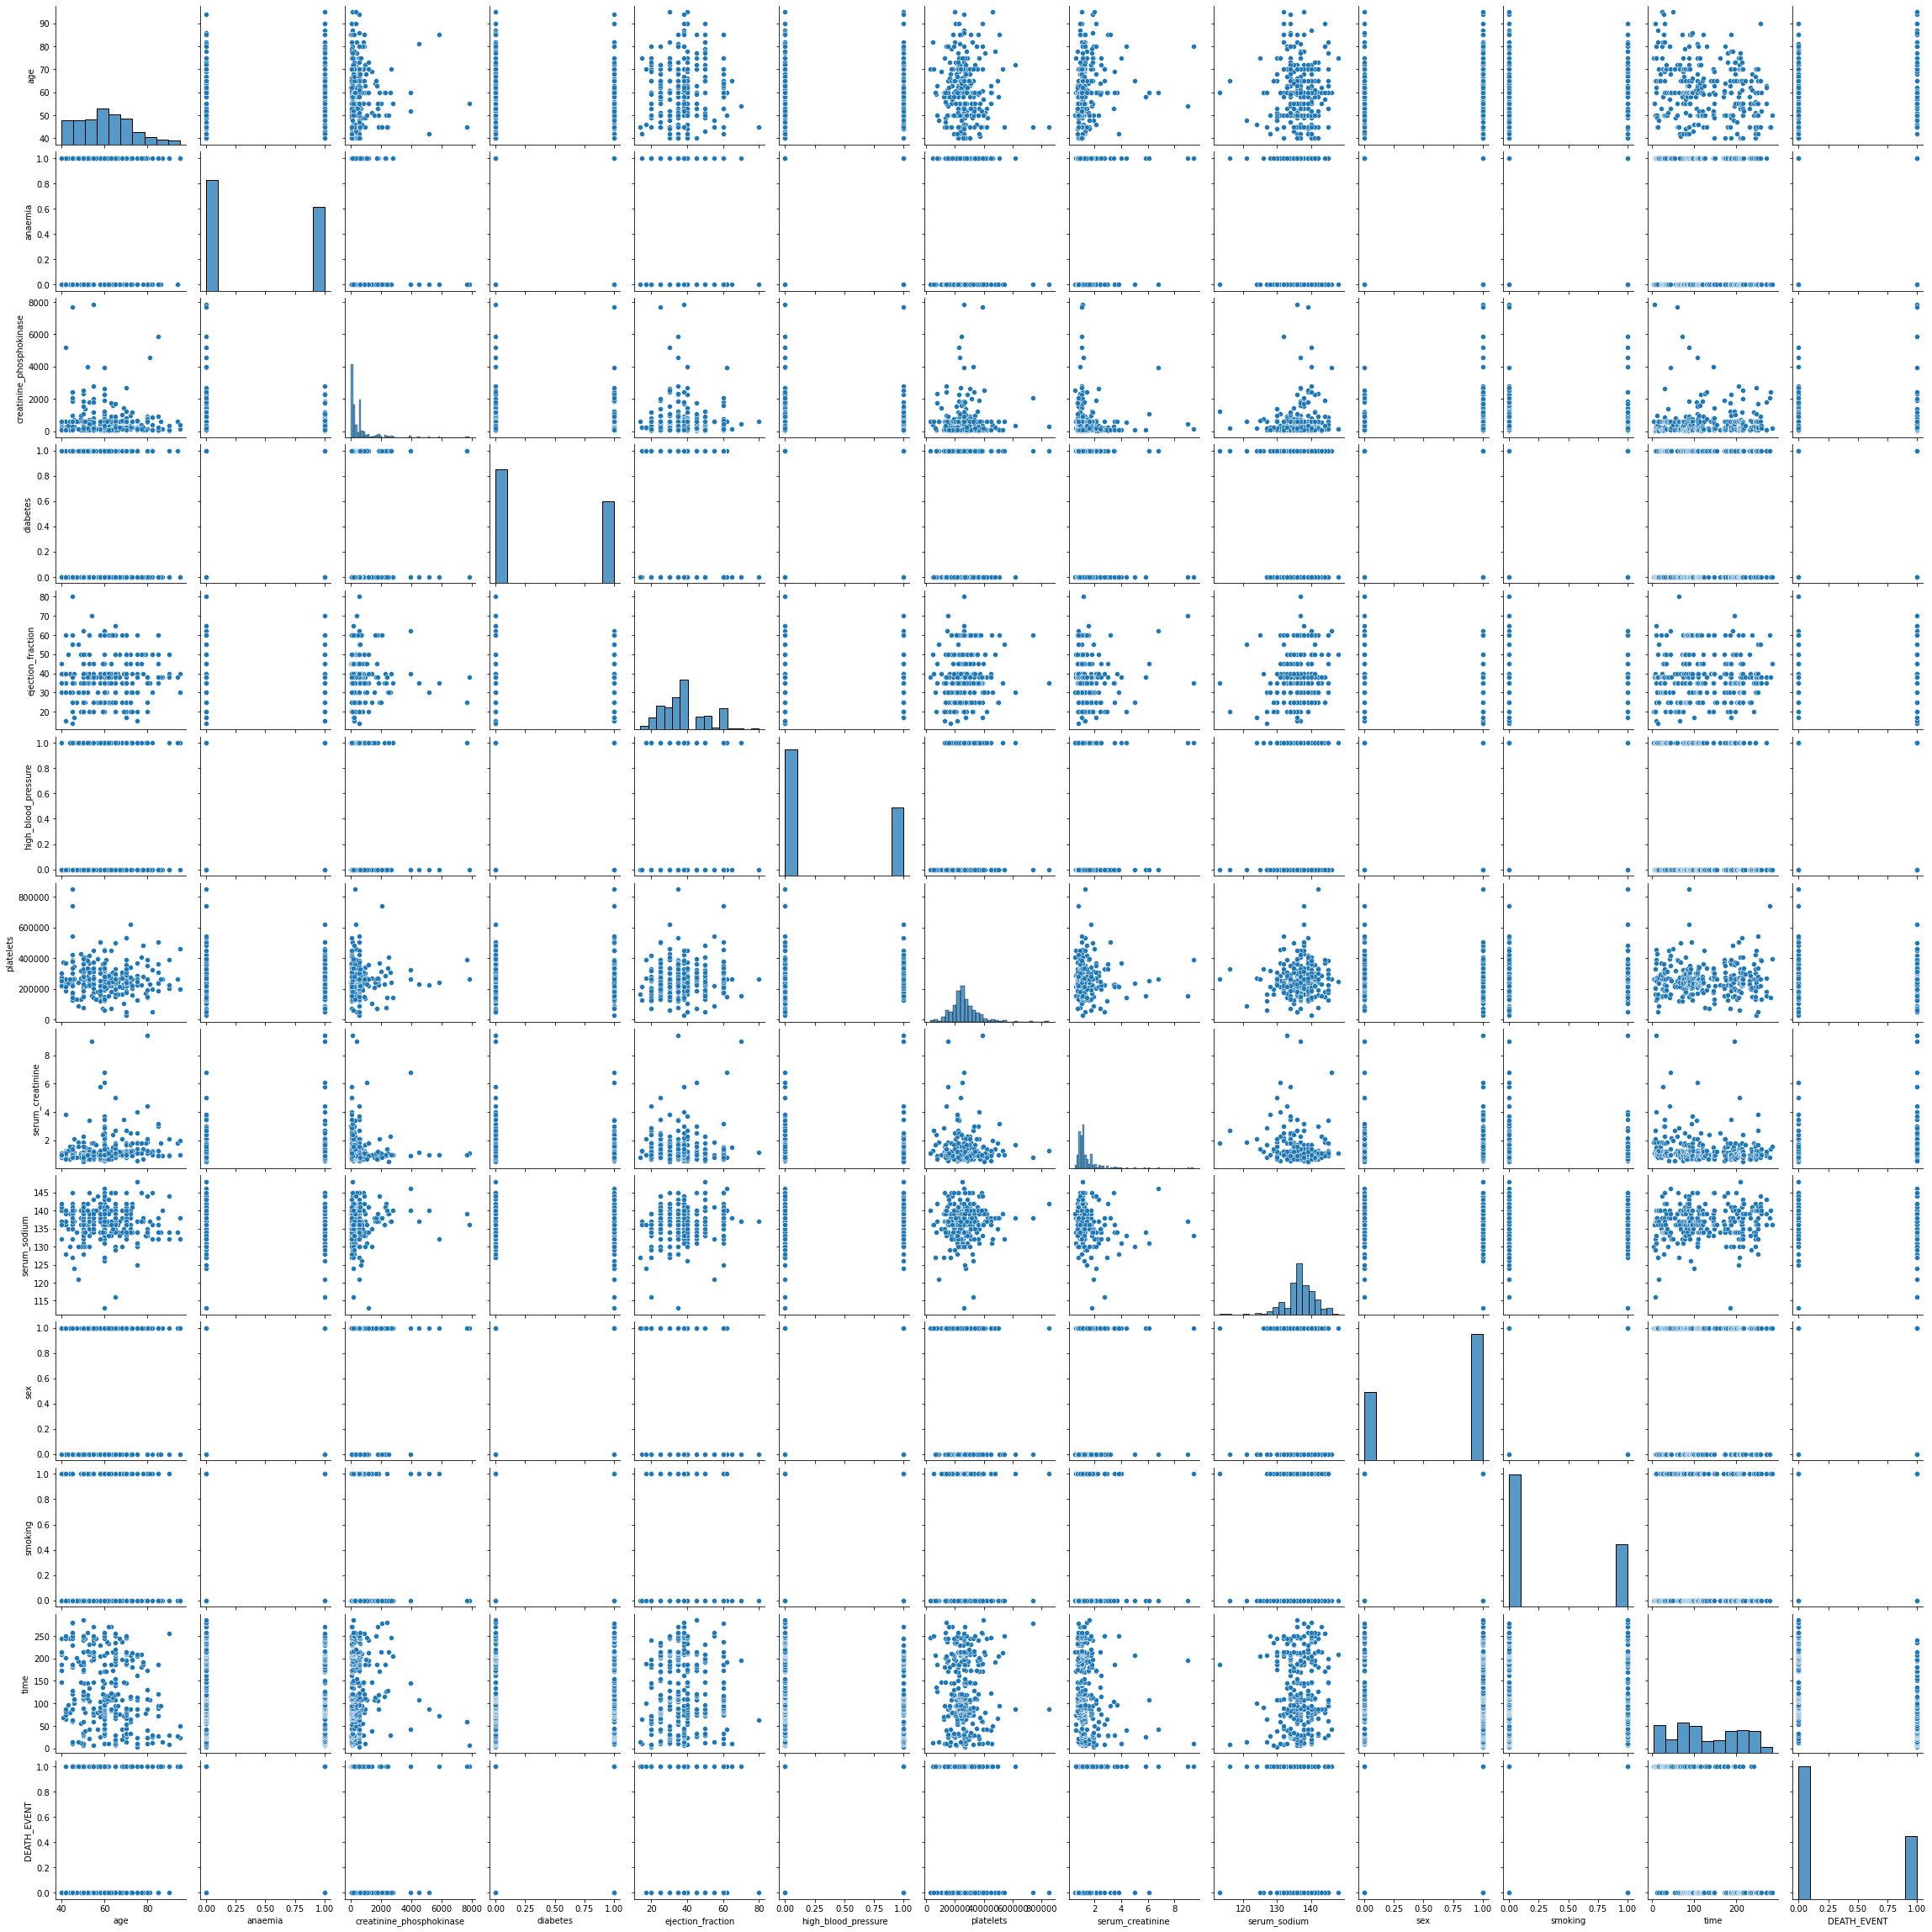

In [19]:
plt.figure(figsize=(3,3),dpi=100)
sns.pairplot(df)
plt.show()

# Data Preprocessing 

### Detecting Outliers using IQR method

In [20]:
def iqr_method(data_frame,column_name):
    q1 = data_frame[column_name].quantile(0.25)
    q3 = data_frame[column_name].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    return(pd.concat([data_frame[data_frame[column_name]<Lower_tail],data_frame[data_frame[column_name]>Upper_tail]]))
iqr_method(df[:],'serum_sodium')

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
4    65.0        1                       160         1                 20   
19   48.0        1                       582         1                 55   
126  46.0        0                       168         1                 17   
199  60.0        0                      1211         1                 35   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
4                      0  327000.00               2.7           116    0   
19                     0   87000.00               1.9           121    0   
126                    1  271000.00               2.1           124    0   
199                    0  263358.03               1.8           113    1   

     smoking  time  DEATH_EVENT  
4          0     8            1  
19         0    15            1  
126        0   100            1  
199        1   186            0

### Automated Code For Handling Outliers

In [21]:
def automated_handling_outliers(df1):
    outlier_feature_names=[]
    for i in df1.columns:
        if len(iqr_method(df1[:],i))>0:
            print(i)
            outlier_feature_names.append(i)
    for i in outlier_feature_names:
        df1[i],fitted_lambda= scipy.stats.boxcox(df1[i] ,lmbda=None)
    return(df1)
df=automated_handling_outliers(df[:])

creatinine_phosphokinase
ejection_fraction
platelets
serum_creatinine
serum_sodium


### Split the Dataset 

In [22]:
X = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=101)

### Scale the Data

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train.shape

(194, 12)

In [26]:
X_test.shape

(105, 12)

### Import Tensorflow Module

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

### Create the model

In [28]:
model = Sequential()
model.add(Dense(12,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam')

### Train the Model

In [30]:
model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),epochs=200)

Epoch 1/200
7/7 [==============================] - 1s 59ms/step - loss: 0.6810 - val_loss: 0.6548
Epoch 2/200
7/7 [==============================] - 0s 12ms/step - loss: 0.6419 - val_loss: 0.6209
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 0.6138 - val_loss: 0.5979
Epoch 4/200
7/7 [==============================] - 0s 13ms/step - loss: 0.5973 - val_loss: 0.5867
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 0.5861 - val_loss: 0.5752
Epoch 6/200
7/7 [==============================] - 0s 14ms/step - loss: 0.5781 - val_loss: 0.5664
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.5692 - val_loss: 0.5617
Epoch 8/200
7/7 [==============================] - 0s 11ms/step - loss: 0.5622 - val_loss: 0.5585
Epoch 9/200
7/7 [==============================] - 0s 12ms/step - loss: 0.5552 - val_loss: 0.5545
Epoch 10/200
7/7 [==============================] - 0s 13ms/step - loss: 0.5461 - val_loss: 0.5516
Epoch 11/200
7/7 [=

Epoch 84/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3082 - val_loss: 0.4437
Epoch 85/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3079 - val_loss: 0.4433
Epoch 86/200
7/7 [==============================] - 0s 11ms/step - loss: 0.3118 - val_loss: 0.4443
Epoch 87/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3051 - val_loss: 0.4514
Epoch 88/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3058 - val_loss: 0.4583
Epoch 89/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3121 - val_loss: 0.4623
Epoch 90/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3083 - val_loss: 0.4421
Epoch 91/200
7/7 [==============================] - 0s 14ms/step - loss: 0.3008 - val_loss: 0.4328
Epoch 92/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3129 - val_loss: 0.4327
Epoch 93/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3099 - val_loss: 0.4359
Epoch 94/2

7/7 [==============================] - 0s 12ms/step - loss: 0.2605 - val_loss: 0.5340
Epoch 167/200
7/7 [==============================] - 0s 13ms/step - loss: 0.2477 - val_loss: 0.5130
Epoch 168/200
7/7 [==============================] - 0s 13ms/step - loss: 0.2439 - val_loss: 0.5209
Epoch 169/200
7/7 [==============================] - 0s 13ms/step - loss: 0.2435 - val_loss: 0.5250
Epoch 170/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2416 - val_loss: 0.5191
Epoch 171/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2457 - val_loss: 0.5184
Epoch 172/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2510 - val_loss: 0.5626
Epoch 173/200
7/7 [==============================] - 0s 13ms/step - loss: 0.2538 - val_loss: 0.5212
Epoch 174/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2429 - val_loss: 0.5193
Epoch 175/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2643 - val_loss: 0.5166
Epoch 176/200


In [31]:
model_loss_1 = pd.DataFrame(model.history.history)

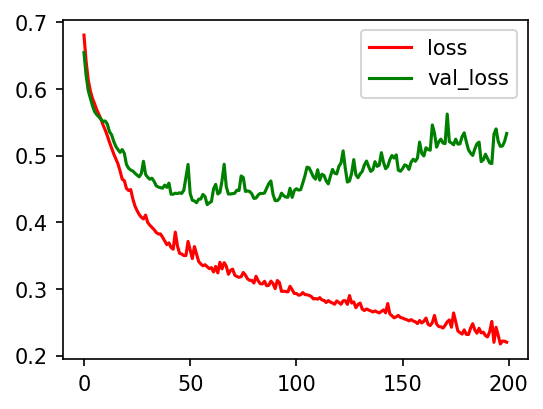

In [32]:
plt.figure(figsize=(4,3),dpi=150)
plt.plot(model_loss_1['loss'],color='r',data=model_loss_1,label='loss')
plt.plot(model_loss_1['val_loss'],color='g',data=model_loss_1,label='val_loss')
plt.legend()
plt.show()


### Train the model with Early Stopping

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
model = Sequential()
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=24,activation='relu'))
model.add(Dense(units=24,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [35]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [36]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
7/7 [==============================] - 1s 46ms/step - loss: 0.6628 - val_loss: 0.6445
Epoch 2/600
7/7 [==============================] - 0s 13ms/step - loss: 0.6534 - val_loss: 0.6346
Epoch 3/600
7/7 [==============================] - 0s 12ms/step - loss: 0.6455 - val_loss: 0.6259
Epoch 4/600
7/7 [==============================] - 0s 12ms/step - loss: 0.6405 - val_loss: 0.6231
Epoch 5/600
7/7 [==============================] - 0s 9ms/step - loss: 0.6370 - val_loss: 0.6178
Epoch 6/600
7/7 [==============================] - 0s 8ms/step - loss: 0.6330 - val_loss: 0.6122
Epoch 7/600
7/7 [==============================] - 0s 13ms/step - loss: 0.6299 - val_loss: 0.6093
Epoch 8/600
7/7 [==============================] - 0s 14ms/step - loss: 0.6275 - val_loss: 0.6066
Epoch 9/600
7/7 [==============================] - 0s 12ms/step - loss: 0.6238 - val_loss: 0.6036
Epoch 10/600
7/7 [==============================] - 0s 12ms/step - loss: 0.6212 - val_loss: 0.6005
Epoch 11/600
7/7 [===

Epoch 84/600
7/7 [==============================] - 0s 12ms/step - loss: 0.3688 - val_loss: 0.4451
Epoch 85/600
7/7 [==============================] - 0s 11ms/step - loss: 0.3603 - val_loss: 0.4200
Epoch 86/600
7/7 [==============================] - 0s 10ms/step - loss: 0.3495 - val_loss: 0.4165
Epoch 87/600
7/7 [==============================] - 0s 11ms/step - loss: 0.3484 - val_loss: 0.4231
Epoch 88/600
7/7 [==============================] - 0s 11ms/step - loss: 0.3471 - val_loss: 0.4239
Epoch 89/600
7/7 [==============================] - 0s 10ms/step - loss: 0.3475 - val_loss: 0.4264
Epoch 90/600
7/7 [==============================] - 0s 11ms/step - loss: 0.3446 - val_loss: 0.4263
Epoch 91/600
7/7 [==============================] - 0s 10ms/step - loss: 0.3413 - val_loss: 0.4323
Epoch 92/600
7/7 [==============================] - 0s 9ms/step - loss: 0.3486 - val_loss: 0.4528
Epoch 93/600
7/7 [==============================] - 0s 11ms/step - loss: 0.3493 - val_loss: 0.4436
Epoch 94/60

In [37]:
model_loss_2 = pd.DataFrame(model.history.history)

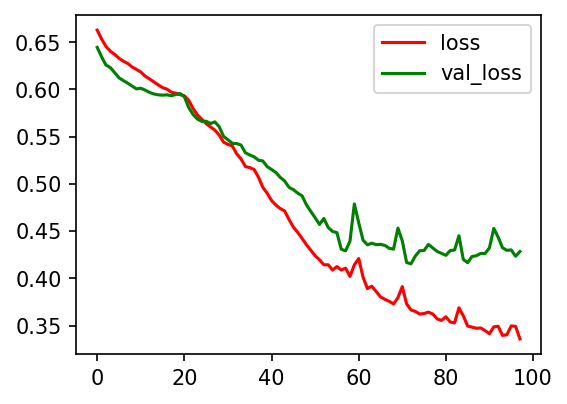

In [38]:
plt.figure(figsize=(4,3),dpi=150)
plt.plot(model_loss_2['loss'],color='r',data=model_loss_2,label='loss')
plt.plot(model_loss_2['val_loss'],color='g',data=model_loss_2,label='val_loss')
plt.legend()
plt.show()


In [39]:
df_y=pd.DataFrame()
df_y['y']=y_test
df_y['y_hat']=model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [40]:
df_y['y_hat']=df_y['y_hat'].apply(lambda x: 1 if x>0.5 else 0)

In [45]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

In [47]:
print("Accuracy Score of the model:",accuracy_score(df_y['y'],df_y['y_hat']))
print("Precision Score of the model:",precision_score(df_y['y'],df_y['y_hat']))
print("Recall Score of the model:",recall_score(df_y['y'],df_y['y_hat']))
print(classification_report(df_y['y'],df_y['y_hat']))

Accuracy Score of the model: 0.819047619047619
Precision Score of the model: 0.71875
Recall Score of the model: 0.696969696969697
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        72
           1       0.72      0.70      0.71        33

    accuracy                           0.82       105
   macro avg       0.79      0.79      0.79       105
weighted avg       0.82      0.82      0.82       105



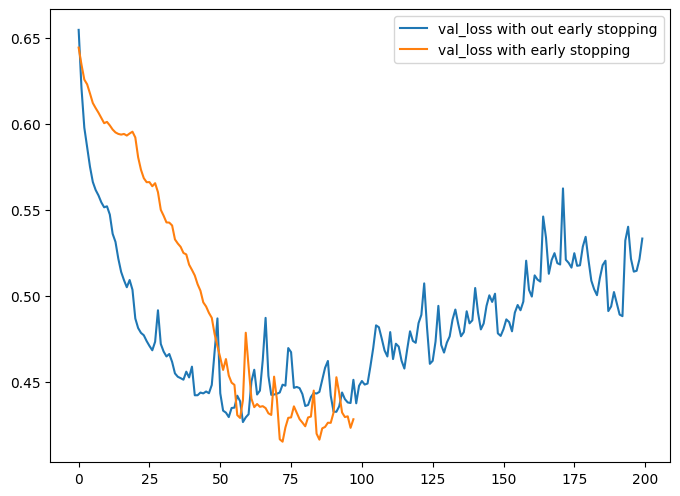

In [43]:
plt.figure(figsize=(8,6),dpi=100)
plt.plot(model_loss_1['val_loss'],data=model_loss_1,label='val_loss with out early stopping')
plt.plot(model_loss_2['val_loss'],data=model_loss_2,label='val_loss with early stopping')
plt.legend()
plt.show()

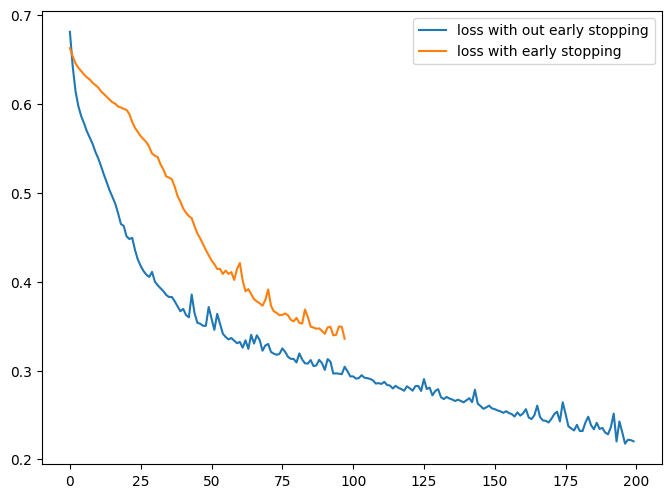

In [44]:
plt.figure(figsize=(8,6),dpi=100)
plt.plot(model_loss_1['loss'],data=model_loss_1,label='loss with out early stopping')
plt.plot(model_loss_2['loss'],data=model_loss_2,label='loss with early stopping')
plt.legend()
plt.show()